## **Loading Dataset**

In [ ]:
# Mounting Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing necessary libraries for data manipulation, visualization, and machine learning
## Importing metrics for evaluating classification performance
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [ ]:
##The dataset smoking_driking_dataset_Ver01.csv is loaded into a Pandas DataFrame.
df = pd.read_csv("/content/drive/My Drive/AI_205_FINALPROJECT/AI-Project/smoking_driking_dataset_Ver01.csv")

In [ ]:
# Displaying a summary of the dataset
df.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,...,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476,122.432498,76.052627,...,56.936800,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892,14.543148,9.889365,...,17.238479,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,...,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


In [ ]:
# Displaying all column names for reference
columns = df.columns

# **Preprocessing**

In [ ]:
## Checking for missing values in the dataset.
df.isnull().sum()

,0
sex,0
age,0
height,0
weight,0
waistline,0
sight_left,0
sight_right,0
hear_left,0
hear_right,0
SBP,0


In [ ]:
# Checking for duplicate rows in the dataset
df.duplicated().sum()

26

In [ ]:
# Removing duplicate rows to clean the dataset
df.drop_duplicates()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N
991342,Male,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N
991343,Female,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y
991344,Male,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N


In [ ]:
#Converts categorical variables (e.g., sex, DRK_YN) into numerical values using LabelEncoder.
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
df["sex"] = le.fit_transform(df["sex"])
df["DRK_YN"] = le.fit_transform(df["DRK_YN"])

In [ ]:

# Converting all columns to float type for uniform processing
for i in df.columns:
  df[i] = df[i].astype('float64')

In [ ]:

# Combining specific smoking categories into a single class for binary classification
df.loc[df["SMK_stat_type_cd"] == 3.0, "SMK_stat_type_cd"] = 0.0
df.loc[df["SMK_stat_type_cd"] == 2.0, "SMK_stat_type_cd"] = 0.0
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1.0,35.0,170.0,75.0,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1.0
1,1.0,30.0,180.0,80.0,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,0.0,0.0
2,1.0,40.0,165.0,75.0,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0.0
3,1.0,50.0,175.0,80.0,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0.0
4,1.0,50.0,165.0,60.0,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,1.0,45.0,175.0,80.0,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,0.0
991342,1.0,35.0,170.0,75.0,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,0.0
991343,0.0,40.0,155.0,50.0,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,0.0,1.0
991344,1.0,25.0,175.0,60.0,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,0.0


In [ ]:
# Calculating correlation between all features and the target variable
corr = df.corr()
corr['SMK_stat_type_cd']

,SMK_stat_type_cd
sex,-0.642598
age,0.073802
height,-0.491795
weight,-0.395614
waistline,-0.234447
sight_left,-0.063685
sight_right,-0.065000
hear_left,0.010414
hear_right,0.012682
SBP,-0.107369


In [ ]:
# Defining columns that need to be standardized (numerical features)
columns_to_be_scaled = ['age','height','weight','waistline','sight_left','sight_right','hear_left','hear_right',
                        'SBP','DBP','BLDS','tot_chole','HDL_chole','LDL_chole','triglyceride','hemoglobin','urine_protein',
                        'serum_creatinine','SGOT_AST','SGOT_ALT','gamma_GTP']

In [ ]:

# Standardizing the specified columns using StandardScaler
from sklearn.preprocessing import StandardScaler
StandardScaler_object = StandardScaler() # Normalizing the dataset
df[columns_to_be_scaled] = StandardScaler_object.fit_transform(df[columns_to_be_scaled])

In [ ]:
# Importing libraries for train-test split and handling imbalanced data
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Splitting dataset into features (X) and target variable (y)
X = df.drop("SMK_stat_type_cd",axis=1)
y = df["SMK_stat_type_cd"]

# Balancing the dataset using RandomUnderSampler to ensure equal class representation
undersampler = RandomUnderSampler(sampling_strategy=1) #Balance the dataset
X, y = undersampler.fit_resample(X, y)


In [ ]:

# Splitting the balanced dataset into training (70%) and testing (30%) subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
# Converting data to NumPy arrays for easier processing
y_train = np.array(y_train).astype(int)
y_test = np.array(y_test).astype(int)

In [ ]:
X_train = X_train.values
X_test = X_test.values

In [44]:

X_train = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
X_val = X_val.values if isinstance(X_val, pd.DataFrame) else X_val
X_test = X_test.values if isinstance(X_test, pd.DataFrame) else X_test


# **Model**

In [46]:

# Lists to store results
y_train_pred_list_sk = []
y_val_pred_list_sk = []
y_test_pred_list_sk = []

# K-fold cross-validation parameters
num_folds = 5
fold_size = len(X_train) // num_folds
X_train_cv = X_train
y_train_cv = y_train

for fold in range(num_folds):
    # Define the start and end index for the validation set
    start_val_index = fold * fold_size
    end_val_index = (fold + 1) * fold_size

    # Create training and validation sets for this fold
    X_train = np.append(X_train_cv[:start_val_index], X_train_cv[end_val_index:], axis=0)
    y_train = np.append(y_train_cv[:start_val_index], y_train_cv[end_val_index:])
    X_val = X_train_cv[start_val_index:end_val_index]
    y_val = y_train_cv[start_val_index:end_val_index]

    # Train Random Forest using Scikit-learn
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Make predictions
    y_train_pred_sk = rf.predict(X_train)
    y_val_pred_sk = rf.predict(X_val)
    y_test_pred_sk = rf.predict(X_test)

    # Store predictions
    y_train_pred_list_sk.append(y_train_pred_sk)
    y_val_pred_list_sk.append(y_val_pred_sk)
    y_test_pred_list_sk.append(y_test_pred_sk)

    # Evaluate the model
    training_accuracy_sk = accuracy_score(y_train, y_train_pred_sk)
    validation_accuracy_sk = accuracy_score(y_val, y_val_pred_sk)
    testing_accuracy_sk = accuracy_score(y_test, y_test_pred_sk)
    training_report_sk = classification_report(y_train, y_train_pred_sk)
    validation_report_sk = classification_report(y_val, y_val_pred_sk)
    testing_report_sk = classification_report(y_test, y_test_pred_sk)

    # Print results for this fold
    print(f"************************************************************************************* Fold {fold} ****************************************************************************************")
    print("Scikit-learn Random Forest Model")
    print(f"Training Accuracy fold {fold}: {training_accuracy_sk:.3f}")
    print(f"Validation Accuracy fold {fold}: {validation_accuracy_sk:.3f}")
    print(f"Testing Accuracy fold {fold}: {testing_accuracy_sk:.3f}")
    print("Classification Report training:\n", training_report_sk)
    print("Classification Report validation:\n", validation_report_sk)
    print("Classification Report testing:\n", testing_report_sk)
    print("**********************************************************************************************************************************************************************************")


************************************************************************************* Fold 0 ****************************************************************************************
Scikit-learn Random Forest Model
Training Accuracy fold 0: 1.000
Validation Accuracy fold 0: 0.829
Testing Accuracy fold 0: 0.829
Classification Report training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    174299
           1       1.00      1.00      1.00    174161

    accuracy                           1.00    348460
   macro avg       1.00      1.00      1.00    348460
weighted avg       1.00      1.00      1.00    348460

Classification Report validation:
               precision    recall  f1-score   support

           0       0.78      0.92      0.84     43622
           1       0.90      0.74      0.81     43492

    accuracy                           0.83     87114
   macro avg       0.84      0.83      0.83     87114
weighted avg       0.

# **Statistical Tests**

In [48]:
# Comparing performance using accuracy, classification report, and t-tests
# Splitting the dataset into training (70%) and testing (30%) subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ensuring that the labels are in integer format for compatibility with statistical functions
y_train = np.array(y_train).astype(int)
y_test = np.array(y_test).astype(int)

In [49]:
# Importing the t-test function to evaluate the statistical significance of predictions
from scipy.stats import ttest_ind

From Sklearn Model

In [50]:
# Using Random Forest from Scikit-learn for testing and evaluation
rf_sk = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [51]:
# Training the Random Forest model on the training data
rf_sk.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [52]:
# Making predictions on the testing dataset
y_pred_sk = rf_sk.predict(X_test)

In [53]:
# Displaying the predicted labels
y_pred_sk

array([0, 1, 0, ..., 1, 0, 1])

In [54]:
# Performing a t-test to compare the predicted values with the ground truth
# The t-test checks whether the predictions (y_pred_sk) are statistically similar to the actual labels (y_test)
t_statistic_sk, p_value_sk = ttest_ind(y_pred_sk, y_test)

In [55]:
print("Scratch T-statistic with ground truth:", t_statistic_sk)
print("Scratch P-value with ground truth:", p_value_sk)

Scratch T-statistic with ground truth: -61.56305372564851
Scratch P-value with ground truth: 0.0


In [56]:
# Calculating the accuracy of predictions against the ground truth
# Accuracy is the proportion of correct predictions
accuracy_score(y_pred_sk, y_test)
accuracy = accuracy_score(y_test, y_pred_sk)

0.8298727624141286

In [57]:
# Generating a classification report
# This provides metrics like precision, recall, F1-score, and support for each class
report = classification_report(y_test, y_pred_sk, output_dict=True)
print(classification_report(y_pred_sk, y_test))

              precision    recall  f1-score   support

           0       0.92      0.78      0.84    137253
           1       0.74      0.90      0.81     96090

    accuracy                           0.83    233343
   macro avg       0.83      0.84      0.83    233343
weighted avg       0.85      0.83      0.83    233343



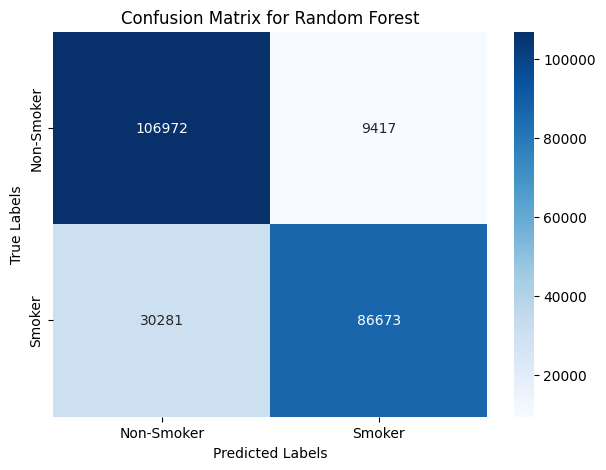

In [76]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred_sk)

plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Smoker", "Smoker"], yticklabels=["Non-Smoker", "Smoker"])
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

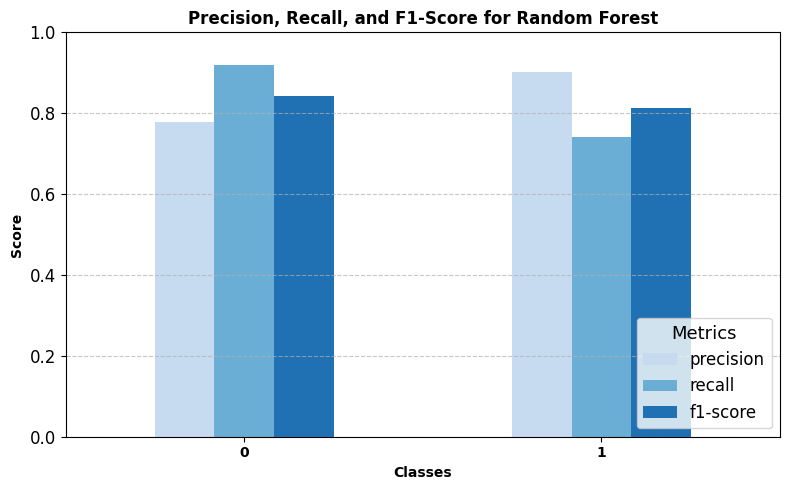

In [73]:
custom_palette = sns.color_palette("Blues", n_colors=3)

# Plot bar charts for precision, recall, and F1-score with enhanced visuals
metrics_df.plot(
    kind="bar",
    figsize=(8, 5),
    color=custom_palette
)

# Add plot details
plt.title("Precision, Recall, and F1-Score for Random Forest", fontsize=12, weight='bold')
plt.xlabel("Classes", fontsize=10, weight='bold')
plt.ylabel("Score", fontsize=10, weight='bold')
plt.ylim(0, 1)  # Scores range from 0 to 1
plt.xticks(rotation=0, fontsize=10, weight='bold')
plt.yticks(fontsize=12)
plt.legend(loc="lower right", fontsize=12, title="Metrics", title_fontsize=13)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the final plot
plt.tight_layout()
plt.show()


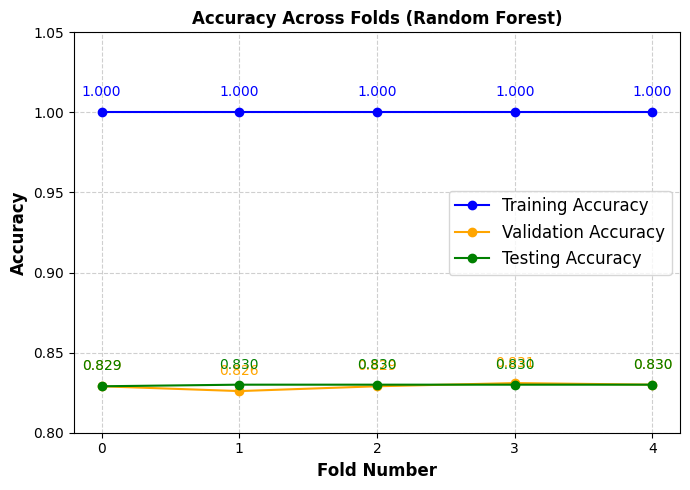

In [82]:
import matplotlib.pyplot as plt

# Plot accuracy metrics
plt.figure(figsize=(7, 5))
plt.plot(folds, training_accuracy, marker='o', label='Training Accuracy', color='blue')
plt.plot(folds, validation_accuracy, marker='o', label='Validation Accuracy', color='orange')
plt.plot(folds, testing_accuracy, marker='o', label='Testing Accuracy', color='green')

# Annotate each point with its corresponding value
for i in range(len(folds)):
    plt.text(folds[i], training_accuracy[i] + 0.01, f"{training_accuracy[i]:.3f}", ha='center', fontsize=10, color='blue')
    plt.text(folds[i], validation_accuracy[i] + 0.01, f"{validation_accuracy[i]:.3f}", ha='center', fontsize=10, color='orange')
    plt.text(folds[i], testing_accuracy[i] + 0.01, f"{testing_accuracy[i]:.3f}", ha='center', fontsize=10, color='green')

# Add plot details
plt.title('Accuracy Across Folds (Random Forest)', fontsize=12, weight='bold')
plt.xlabel('Fold Number', fontsize=12, weight='bold')
plt.ylabel('Accuracy', fontsize=12, weight='bold')
plt.ylim(0.8, 1.05)  # Accuracy range
plt.xticks(folds)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()
